# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [14]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Words fail to describe this...
1,✅ Trip Verified | Absolutely terrible experie...
2,✅ Trip Verified | BA overbook every flight to ...
3,✅ Trip Verified | \r\nThe flights were all on...
4,Not Verified | Only the second time flying BA ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

A. Cleaning the data

In [15]:
df[['verification','reviews']] = df['reviews'].str.split('|',expand=True)
df.head()

,reviews,verification
0,Words fail to describe this last awful fligh...,✅ Trip Verified
1,Absolutely terrible experience. The app woul...,✅ Trip Verified
2,BA overbook every flight to maximise their in...,✅ Trip Verified
3,"\r\nThe flights were all on time, except Bel...",✅ Trip Verified
4,Only the second time flying BA as first time ...,Not Verified


In [16]:
df = df.drop(columns=['verification'])
df.head()

,reviews
0,Words fail to describe this last awful fligh...
1,Absolutely terrible experience. The app woul...
2,BA overbook every flight to maximise their in...
3,"\r\nThe flights were all on time, except Bel..."
4,Only the second time flying BA as first time ...


In [17]:
df.to_csv('BA_reviews.csv')

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(review):
    words = review.split()  
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    cleaned_review = ' '.join(cleaned_words)
    return cleaned_review

In [20]:
df['cleaned_reviews'] = df['reviews'].apply(remove_stopwords)

Sentiment Analysis

In [29]:
from textblob import TextBlob

In [30]:
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment)
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['sentiment'].apply(lambda x:x.subjectivity)

In [32]:
df = df.drop(columns=['reviews'])
df.head()

,cleaned_reviews,sentiment,polarity,subjectivity
0,Words fail describe last awful flight - baby a...,"(-0.31786589635854345, 0.5868697478991596)",-0.317866,0.586870
1,Absolutely terrible experience. app would let ...,"(-0.23392857142857137, 0.47619047619047616)",-0.233929,0.476190
2,BA overbook every flight maximise income regar...,"(-0.425, 0.5483333333333332)",-0.425000,0.548333
3,"flights time, except Belfast London never is. ...","(0.05000000000000001, 0.13333333333333333)",0.050000,0.133333
4,second time flying BA first time wasn’t positi...,"(0.03980278980278981, 0.3971139971139971)",0.039803,0.397114


In [33]:
df['sentiment_category'] = df['polarity'].apply(lambda x:'Positive' if x > 0 else 'Negative')

In [34]:
df.head()

,cleaned_reviews,sentiment,polarity,subjectivity,sentiment_category
0,Words fail describe last awful flight - baby a...,"(-0.31786589635854345, 0.5868697478991596)",-0.317866,0.586870,Negative
1,Absolutely terrible experience. app would let ...,"(-0.23392857142857137, 0.47619047619047616)",-0.233929,0.476190,Negative
2,BA overbook every flight maximise income regar...,"(-0.425, 0.5483333333333332)",-0.425000,0.548333,Negative
3,"flights time, except Belfast London never is. ...","(0.05000000000000001, 0.13333333333333333)",0.050000,0.133333,Positive
4,second time flying BA first time wasn’t positi...,"(0.03980278980278981, 0.3971139971139971)",0.039803,0.397114,Positive


Topic Modelling 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

In [37]:
topicsnum = 5
lda_model = LatentDirichletAllocation(n_components=topicsnum,random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [38]:
feature_names = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index + 1}")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic #1
upperdeck, barbara, edreams, conducted, a17, assignment, 83k, 83a, oversize, 4cm

Topic #2
flowers, jeddah, delight, nose, alaska, stuttgart, kindness, insurance, assignments, road

Topic #3
fco, ambassador, stammers, applying, maddie, parents, on39j, admitted, lighter, laughs

Topic #4
commodity, dispensable, clicking, reader, outraged, function, clubs, itsu, overbook, income

Topic #5
flight, ba, service, london, seat, good, crew, food, time, class



In [39]:
topic_result = lda_model.transform(dtm)
df['dominant_topic'] = topic_result.argmax(axis=1)

In [42]:
df.head()

,cleaned_reviews,sentiment,polarity,subjectivity,sentiment_category,dominant_topic
0,Words fail describe last awful flight - baby a...,"(-0.31786589635854345, 0.5868697478991596)",-0.317866,0.586870,Negative,4
1,Absolutely terrible experience. app would let ...,"(-0.23392857142857137, 0.47619047619047616)",-0.233929,0.476190,Negative,4
2,BA overbook every flight maximise income regar...,"(-0.425, 0.5483333333333332)",-0.425000,0.548333,Negative,4
3,"flights time, except Belfast London never is. ...","(0.05000000000000001, 0.13333333333333333)",0.050000,0.133333,Positive,4
4,second time flying BA first time wasn’t positi...,"(0.03980278980278981, 0.3971139971139971)",0.039803,0.397114,Positive,4


Wordcloud

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [44]:
text = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)


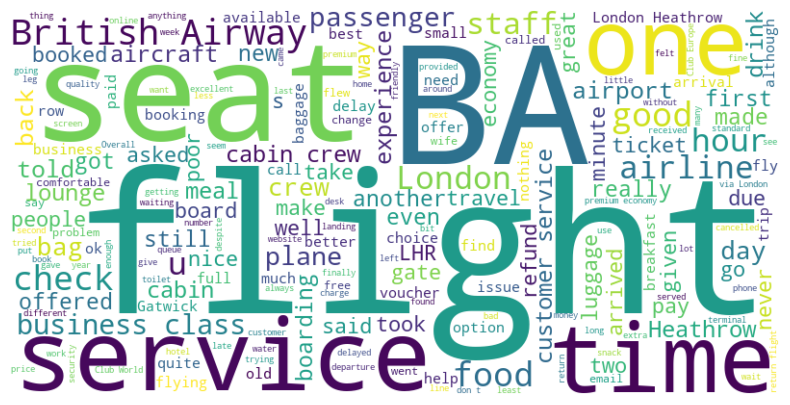

In [45]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
df = df.drop(columns=['polarity','subjectivity','sentiment'])
df.head()

,cleaned_reviews,sentiment_category,dominant_topic
0,Words fail describe last awful flight - baby a...,Negative,4
1,Absolutely terrible experience. app would let ...,Negative,4
2,BA overbook every flight maximise income regar...,Negative,4
3,"flights time, except Belfast London never is. ...",Positive,4
4,second time flying BA first time wasn’t positi...,Positive,4


In [49]:
value_counts = df['sentiment_category'].value_counts()
print(value_counts)

Positive    673
Negative    327
Name: sentiment_category, dtype: int64
